# Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll investigate using scikit-learn with regularization in order to produce better models.

## Objectives

- Compare the different inputs with logistic regression models and determine the optimal model 

In [2]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

## Import the data

Import the dataset stored in `'heart.csv'`.

In [3]:
# Import the data

df = pd.read_csv('heart.csv')

# Print the first five rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Split the data

Define `X` and `y` where the latter is the `target` variable. This time, follow best practices and also implement a standard train-test split. Assign 25% to the test set and set the `random_state` to 17. 

In [4]:
# Define X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Split the data into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

target
1.0    130
0.0     97
Name: count, dtype: int64 

 target
0.0    41
1.0    35
Name: count, dtype: int64


## Initial Model - scikit-learn

Use scikit-learn to build the logistic regression model.

Turn off the intercept and set the regularization parameter, `C`, to a ridiculously large number such as 1e16. 

In [5]:
# Your code here
logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
model_initial = logreg.fit(X_train, y_train)
model_initial

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1e+16
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


## Create an ROC Curve for the scikit-learn model

Use both the training and test sets.

Train AUC: 0.9291038858049168
Test AUC: 0.9526132404181185


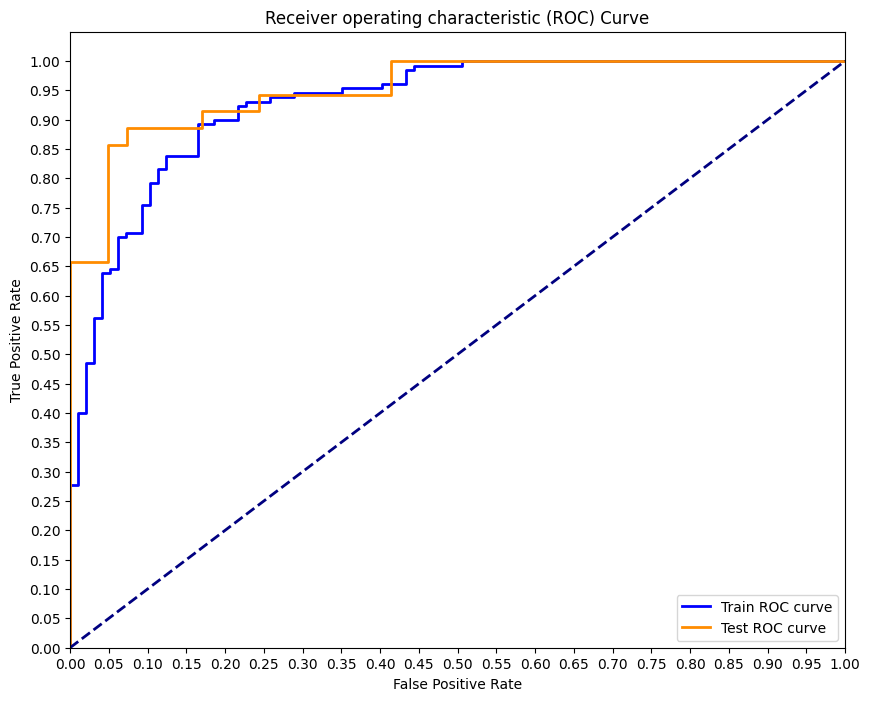

In [7]:
# Your code here

y_train_score = logreg.fit(X_train, y_train).decision_function(X_train)
y_test_score = logreg.fit(X_test, y_test).decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)


print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Add an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter `C` set to a very large number such as 1e16. 

In [8]:
# Create new model
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')
model_intercept = logregi.fit(X_train, y_train)
model_intercept

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1e+16
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


Generate predictions for the training and test sets.

In [9]:
# Generate predictions
y_hat_train = logregi.predict(X_train)
y_hat_test = logregi.predict(X_test)

Plot all three models ROC curves on the same graph.

Custom Model Test AUC: 0.8331010452961672
Custome Model Train AUC: 0.8429817605075336
Scikit-learn Model 1 Test AUC: 0.9526132404181185
Scikit-learn Model 1 Train AUC: 0.7953211736716892
Scikit-learn Model 2 with intercept Test AUC: 0.9526132404181185
Scikit-learn Model 2 with intercept Train AUC: 0.7953211736716892


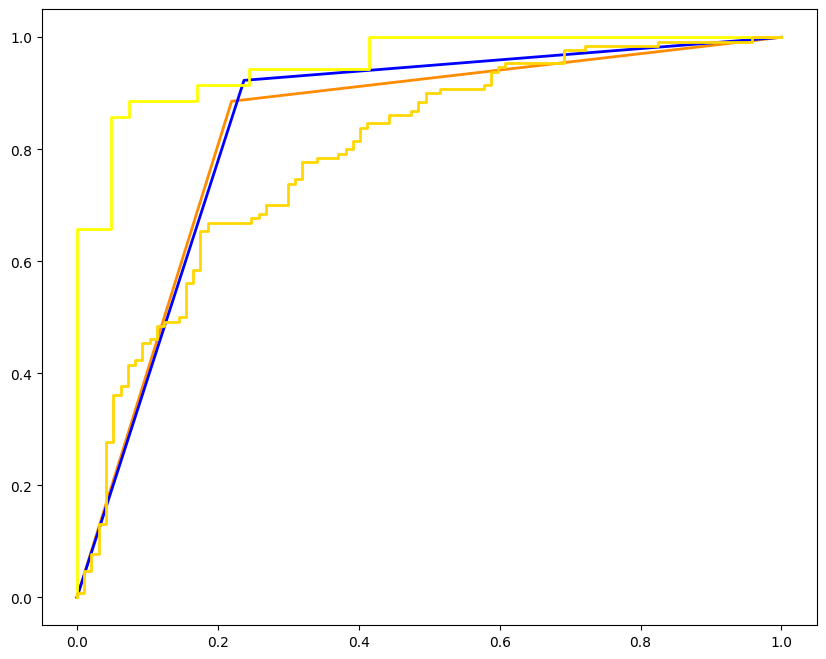

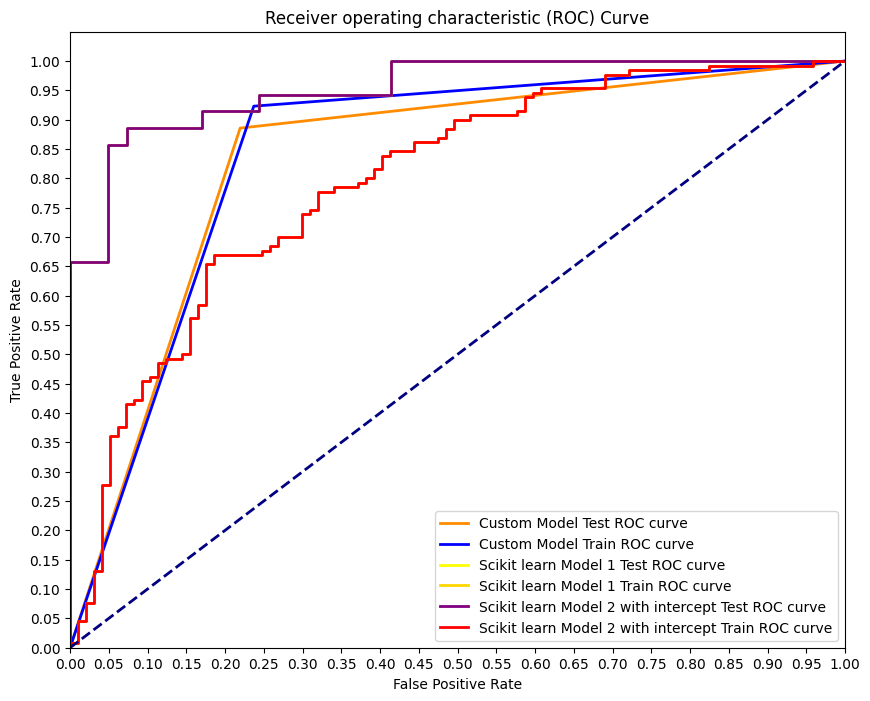

In [11]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score2 = logregi.decision_function(X_test)
y_train_score2 = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (`C`) parameters. For each, plot the ROC curve of the training and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and training AUC as you go along.

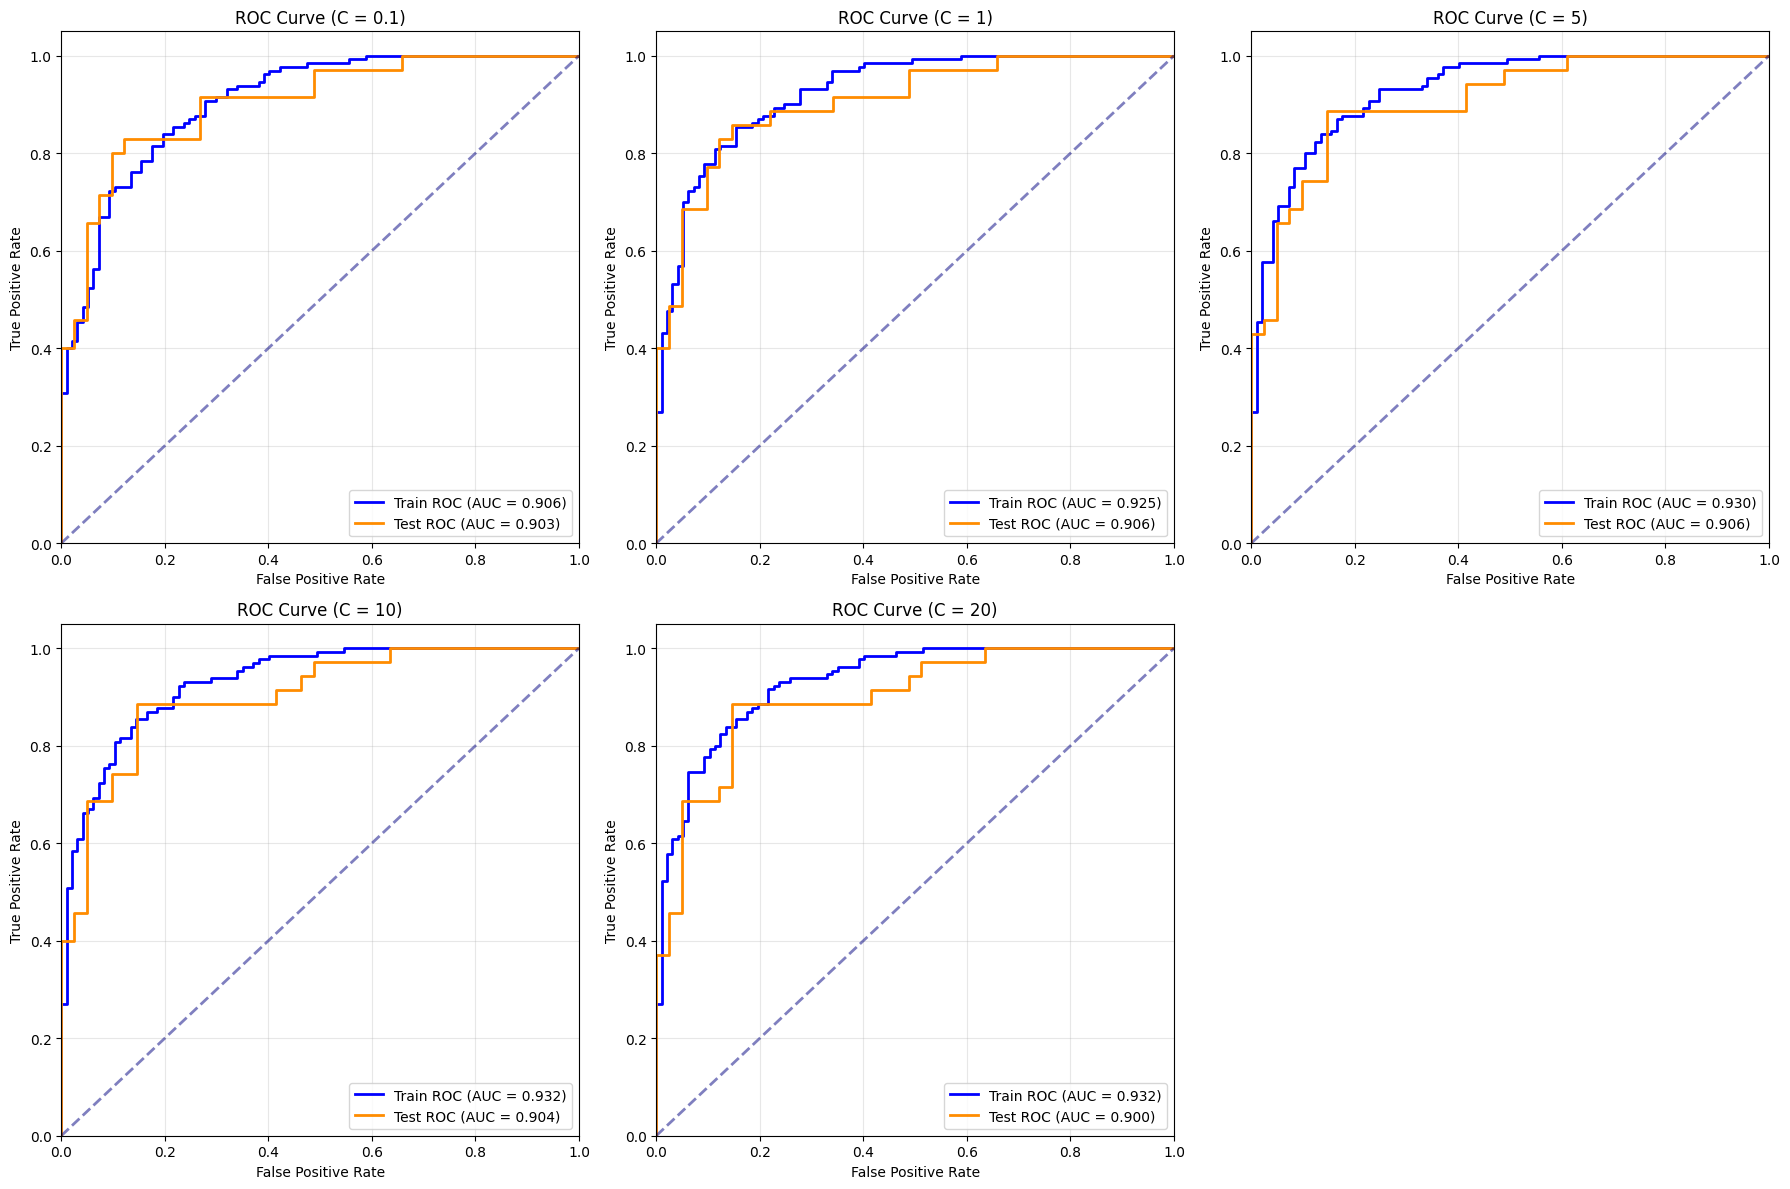


Summary of AUC scores for different regularization parameters:
C Value   Train AUC   Test AUC    Difference
--------------------------------------------------
0.1       0.9056      0.9031      0.0024
1         0.9251      0.9059      0.0192
5         0.9301      0.9059      0.0242
10        0.9317      0.9038      0.0279
20        0.9323      0.8997      0.0326


In [12]:
# Your code here
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import numpy as np

# Define different regularization parameters to test
C_values = [0.1, 1, 5, 10, 20]  # You can adjust these values

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Flatten the axes array for easier indexing
for i, c_value in enumerate(C_values):
    # Create and train logistic regression model with specific C
    logreg = LogisticRegression(C=c_value, random_state=17, max_iter=1000)
    logreg.fit(X_train, y_train)
    
    # Get predictions for both train and test
    y_train_score = logreg.decision_function(X_train)
    y_test_score = logreg.decision_function(X_test)
    
    # Calculate ROC curves
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_score)
    
    # Calculate AUC scores
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    
    # Plot ROC curves
    axes[i].plot(train_fpr, train_tpr, color='blue', lw=2, label=f'Train ROC (AUC = {train_auc:.3f})')
    axes[i].plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'Test ROC (AUC = {test_auc:.3f})')
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
    
    # Customize subplot
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve (C = {c_value})')
    axes[i].legend(loc='lower right')
    axes[i].grid(True, alpha=0.3)

# Remove the empty subplot if we have an odd number
if len(C_values) < len(axes):
    for j in range(len(C_values), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary of AUC scores for different regularization parameters:")
print("C Value".ljust(10) + "Train AUC".ljust(12) + "Test AUC".ljust(12) + "Difference")
print("-" * 50)

for i, c_value in enumerate(C_values):
    # Recreate models to get AUC values for the table
    logreg = LogisticRegression(C=c_value, random_state=17, max_iter=1000)
    logreg.fit(X_train, y_train)
    
    y_train_score = logreg.decision_function(X_train)
    y_test_score = logreg.decision_function(X_test)
    
    train_auc = auc(roc_curve(y_train, y_train_score)[0], roc_curve(y_train, y_train_score)[1])
    test_auc = auc(roc_curve(y_test, y_test_score)[0], roc_curve(y_test, y_test_score)[1])
    diff = train_auc - test_auc
    
    print(f"{c_value:<10}{train_auc:<12.4f}{test_auc:<12.4f}{diff:.4f}")

How did the regularization parameter impact the ROC curves plotted above? 

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.